# <img src="./img/uomlogo.png" align="left"/><br><br>
# PHYS20762 - Project 3: Monte Carlo Techniques

Harry Taylor<br>
University of Manchester  
February 2023

In [1]:
# initialising 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

All of the data from Table 1 has been added in the cell below as well as $N_A$, Avogadro's constant.  This will later be used to calculate the mean free path, $\lambda$ $(cm)$, and the absorption probability of each material.

In [37]:
# define all constants given in Table 1
# water
abs_cs_water = 0.6652*10**-24 #(cm^2)
sca_cs_water = 103.0*10**-24 #(cm^2)
rho_water = 1.00 #(g/cm^3)
mol_mass_water = 18.0153 #(g/mol)

# lead
abs_cs_lead = 0.158*10**-24 #(cm^2)
sca_cs_lead = 11.221*10**-24 #(cm^2)
rho_lead = 11.35 #(g/cm^3)
mol_mass_lead = 207.2 #(g/mol)

# graphite
abs_cs_graphite = 0.0045*10**-24 #(cm^2)
sca_cs_graphite = 4.74*10**-24 #(cm^2)
rho_graphite = 1.67 #(g/cm^3)
mol_mass_graphite = 12.011 #(g/mol)

# define avogradro's constant
N_A = 6.0221408*10**23 #(per mol)

In the cell below, $numpy.random.uniform()$ is used to generate uniformly distributed numbers between 0 and 1.  Arrays are printed to demonstrate that the numbers generated appear random when examining them.  Histograms are then plotted below, containing 10000 numbers each, and it can be seen that the numbers are uniformly disributed by observation.

Here are 25 numbers generated by numpy.random.uniform().

[[0.60479058 0.30194946 0.12515929 0.10055478 0.60731835]
 [0.35337182 0.36333153 0.40337961 0.01643861 0.37205008]
 [0.06947847 0.3432894  0.69163187 0.11630912 0.44546745]
 [0.03629008 0.31778006 0.44588313 0.76012793 0.24147971]
 [0.93666017 0.903304   0.68340139 0.16012733 0.98107665]]


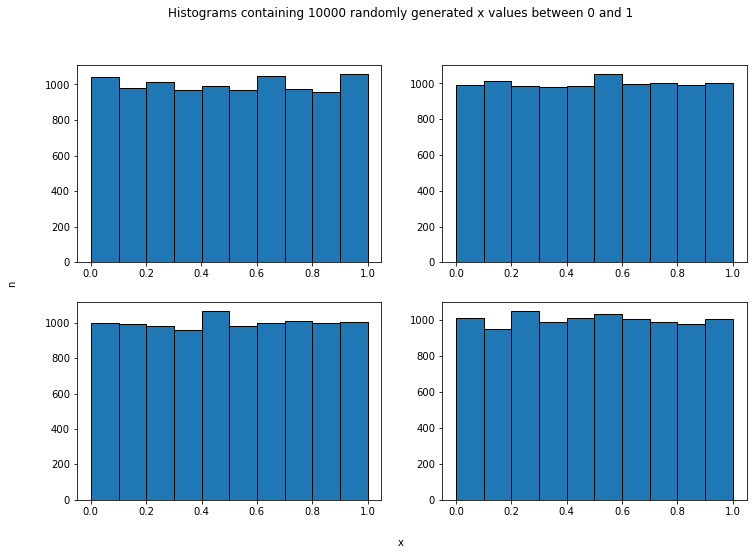

In [38]:
# print 25 random numbers generated by numpy.random.uniform()
print("Here are 25 numbers generated by numpy.random.uniform().\n")
print(np.random.uniform(size = (5, 5)))

# make sure plot is non-interactive
%matplotlib inline

# create and size figure and create subplots
fig, ax = plt.subplots(2, 2, figsize = (12,8))

for i in range(2):
    for k in range(2):
        # plot histogram with uniform randomly generated data
        ax[i][k].hist(np.random.uniform(size = 10000), bins = 10, ec = 'k')

# add title and label axes
fig.suptitle("Histograms containing 10000 randomly generated x values between 0 and 1")
fig.text(0.5, 0.05, "x", ha='center', va='center')
fig.text(0.05, 0.5, "n", ha='center', va='center', rotation='vertical')
plt.show()

As it has been confirmed above that $np.random.uniform()$ produces uniformly distributed random numbers, a second check that must be made is whether the numbers have any systematic relation.  An array containing the 3D positions, (x, y, z), of 1000 points is generated using $np.random.uniform()$.  This is then shown on a 3D interactive plot which can be rotated to see that there are no spectral issues or correlation between the numbers.

<IPython.core.display.Javascript object>


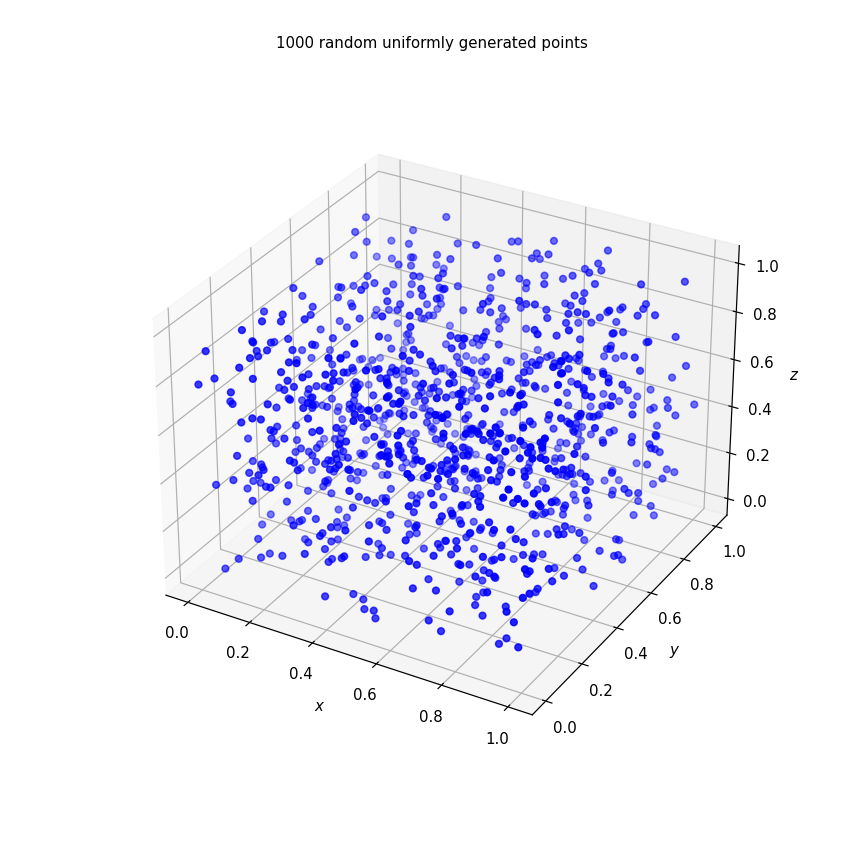

In [42]:
# generate array of random x, y and z values
randr = np.random.uniform(size = (1000, 3))

# make plot interactive
%matplotlib notebook

# repeated to fix graphics issues
%matplotlib notebook

# create and size figure, then create 3D subplot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = '3d')

# plot data, label axes and add title
ax.scatter(randr[:,0], randr[:,1], randr[:,2], color = 'b')
fig.text(0.5, 0.95, "1000 random uniformly generated points", ha='center', va='center')
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
plt.show()

Below is the $randssp$ method for generating random numbers, which has known spectral issues.  The $randssp$ function has been used to generate a set of random points which are then shown on a 3D plot.  The viewing angle has been selected to show the spectral issues clearly.

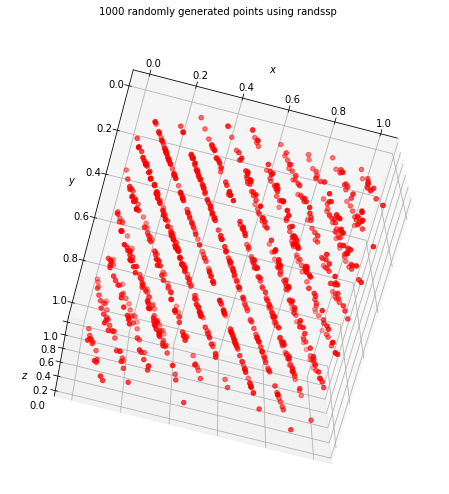

In [43]:
# Copied Code Below
 
#  RANDSSP Multiplicative congruential uniform random number generator.
#  Based on the parameters used by IBM's Scientific Subroutine Package.
#  The statement
#     r = randssp(m,n)
#  generates an m-by-n random matrix.
#  The function can not accept any other starting seed.
#
#  This function uses the "bad" generator parameters that IBM
#  used in several libraries in the 1960's.  There is a strong
#  serial correlation between three consecutive values.

def randssp(p,q):
    
    global m, a, c, x
        
    try: x
    except NameError:
        m = pow(2, 31)
        a = pow(2, 16) + 3
        c = 0
        x = 123456789
    
    try: p
    except NameError:
        p = 1
    try: q
    except NameError:
        q = p
    
    r = np.zeros([p,q])

    for l in range (0, q):
        for k in range (0, p):
            x = np.mod(a*x + c, m)
            r[k, l] = x/m
    
    return r


# Copied Code Ends Here
# use function to generate data
data = randssp(3,1000)

# make plot non-interactive
%matplotlib inline

# create and size figure, then create 3D subplot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d')

# plot data, label axes and add title
ax.scatter(data[0,:], data[1,:], data[2,:], color = 'r')
fig.text(0.5, 0.95, "1000 randomly generated points using randssp", ha='center', va='center')
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

# select viewing angle
ax.view_init(elev = -70, azim = -105)
plt.show()

Now, using the uniformly generated numbers, exponentially distributed random numbers can be produced.  This will be used later to determine the step size each neutron takes between each event when within the material.  First a function is defined which generates an array of a chosen size containing exponentially distributed random numbers.  Then, a histogram is plotted of the random numbers and it has the shape of an exponential curve as expected.  The mean free path, $\lambda$ $(cm)$, for water in the absence of scattering is used here.  A linear relationship is then formed between the values of the random numbers and $\log(count\,of\,each\,bin)$ and plotted to extract the attenuation length of the exponential curve, which should be equal to the value of $\lambda$ used to generate the numbers.

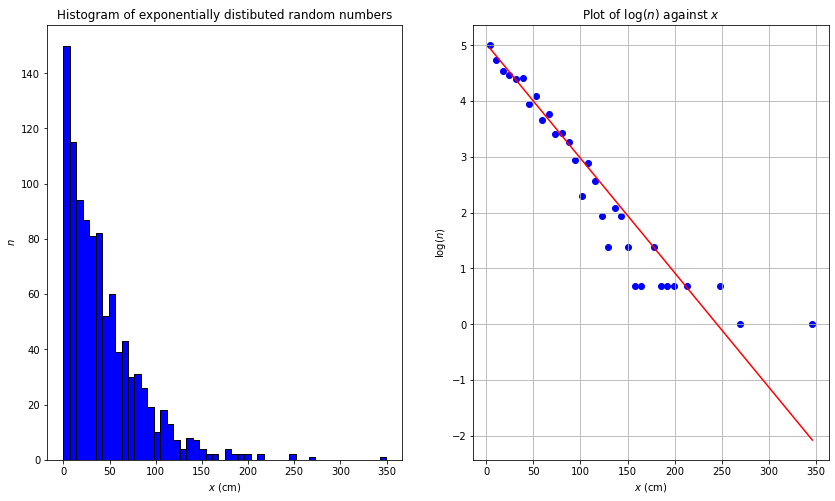

The Attenuation Length of Water is 48.74 ± 1.9 cm, in the absence of scattering


In [44]:
# function that generates random numbers according to an exponential function, when given a mean free path (mfp)
def rand_exp(rand_arr, mfp):
    """
    This function creates an array of exponentially distributed random numbers, according to the exponential function
    exp(-x/mfp)
    
    Parameters: rand_arr - array of floats, input array of uniform random numbers
                mfp - float, mean free path of material being used

    Returns: array of exponentially distributed random numbers        
    """
    return -mfp*np.log(rand_arr)


# calculate water mfp in the absence of scattering
mfp_water_abs = mol_mass_water/(rho_water*N_A*abs_cs_water) # (cm)

# make sure plot is non-interactive
%matplotlib inline

# create and size figure and create subplots
fig, ax = plt.subplots(1, 2, figsize = (14,8))

# plot histogram and obtain frequency and bin placement data
hist_data = ax[0].hist(rand_exp(np.random.uniform(size = 1000), mfp_water_abs), 50, color = 'b', ec = 'k')

# add title and label axes of first plot
ax[0].set_title("Histogram of exponentially distibuted random numbers")
ax[0].set_xlabel("$x$ (cm)")
ax[0].set_ylabel("$n$")

# assign number and bin data
n = hist_data[0]
bins = hist_data[1]

# create empty array for average bin values
bin_avg = np.zeros([len(bins)-1])
for i in range(len(bins)-1):
    
    # calculate average value of each bin
    bin_avg[i] = (bins[i] + bins[i+1])/2

# find indices of all n for which log(n) is undefined, i.e where n = 0
undef_logs = np.where(n == 0)

# remove values with n = 0 as they cannot be logged
n = np.delete(n, undef_logs)
bin_avg = np.delete(bin_avg, undef_logs)

# plot log(n) against average bin value
ax[1].scatter(bin_avg, np.log(n), color = 'b')

# calculate weighting of fit
weights = n/np.sum(n)

# fit linear relationship to data
fit_coef, fit_covr = np.polyfit(bin_avg, np.log(n), 1, w = weights, cov = True)
fit_vals = np.polyval(fit_coef, np.arange(bin_avg[0],bin_avg[-1],0.1))

# plot fitted data against range of x values
ax[1].plot(np.arange(bin_avg[0],bin_avg[-1],0.1), fit_vals, 'r') 

# add title and label axes of second plot and add grid for clarity
ax[1].set_title("Plot of $\log(n)$ against $x$")
ax[1].set_xlabel("$x$ (cm)")
ax[1].set_ylabel("$\log(n)$")
ax[1].grid()

# show plots
plt.show()

# calculate attenuation length and it's error using gradient and then print
attenuation_len = -1/fit_coef[0]
attenuation_len_err = np.abs(attenuation_len*(np.sqrt(fit_covr[0][0])/fit_coef[0]))
print("The Attenuation Length of Water is {0:.4} \u00b1 {1:.3} cm, in the absence of scattering".format(attenuation_len, 
                                                                                                  attenuation_len_err))

In the cell below, a function is defined which generates the co-ordinates for random 3D isotropic points.  The isotropic points are all generated with a length of 1, to produce a uniform sphere, which is shown in the figure below.

In [45]:
# function that generates an isotropic r vector (with 3 components x, y and z)
def rand_iso(n, step_len):
    """
    This function creates an array of 3D isotropic points, of a chosen size and with chosen lengths, returning the x, y and
    z co-ords of each point.
    
    Parameters: n - integer, length of returned array
                step_len - float or array of size n, integer if you want all points to have the same length, array if not
                
    Returns: r - array of floats, size (3 x n) containing the x, y and z components of each isotropic point
    """
    # create arrays of uniformly distributed random angles for phi and theta
    phi = np.random.uniform(0, 2*np.pi, size = n)
    theta = np.arccos(1 - 2*np.random.uniform(size = n))
    
    # create empty array for position (2D array of x, y and z coords)
    r = np.zeros([n,3])
    
    # assign each value of the position array 
    r[:,0] = step_len*np.sin(theta)*np.cos(phi)
    r[:,1] = step_len*np.sin(theta)*np.sin(phi)
    r[:,2] = step_len*np.cos(theta)
    return r

# generate coords
r_circ = rand_iso(1500, 1)

# make plot interactive
%matplotlib notebook

# repeat to fix graphics errors
%matplotlib notebook

# create and size figure then add subplot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = '3d')

# plot coords, add title, and size and label axes
ax.scatter(r_circ[:,0] ,r_circ[:,1] ,r_circ[:,2] , color = 'b')
ax.set_box_aspect(aspect = (1,1,1))
fig.text(0.5, 0.95, "1500 isotropic randomly generated points with a length of 1", ha='center', va='center')
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
plt.show()

<IPython.core.display.Javascript object>

Here, the lengths are not all set to 1 but instead are exponentially distributed using the $rand\,exp$ function defined earlier.  Below are plots containing the isotropic points themselves shown in 3D, and a histogram containing the step lengths of all of the points.

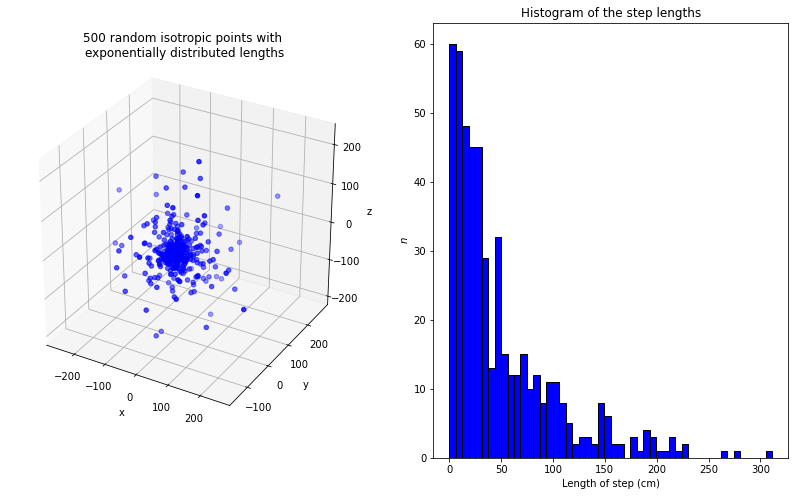

In [46]:
# generate coords with exponentially distributed lengths
r_exp = rand_iso(500, rand_exp(np.random.uniform(size = 500), mfp_water_abs))

# make plot non-interactive
%matplotlib inline

# create figure than add subplots
fig = plt.figure(figsize = (14,8))
ax1 = fig.add_subplot(121, projection = '3d')

# plot points in 3d space, add title, and size and label axes
ax1.scatter(r_exp[:,0] ,r_exp[:,1] ,r_exp[:,2] , color = 'b')
ax1.set_box_aspect(aspect = (1,1,1))
ax1.set_title("500 random isotropic points with \nexponentially distributed lengths")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")

# create another subplot and plot a histogram of the step lengths
ax2 = fig.add_subplot(122)
ax2.hist(np.sqrt(r_exp[:,0]**2 + r_exp[:,1]**2 + r_exp[:,2]**2), 50, color = 'b', ec = 'k')

# add title and label axes of second subplot
ax2.set_title("Histogram of the step lengths")
ax2.set_xlabel("Length of step (cm)")
ax2.set_ylabel("$n$")
plt.show()

In the cell below, the mean free path, $\lambda$ and the probability of absorption is calculated for each material using the microscopic cross sections, density and molar masses defined earlier.  These are then used in the $rand\,walk$ function which simulates the random walk of neutrons after entering a material, in this case water.  Once this is done, the paths of the neutrons are plotted on an interactive 3D figure, with the starting and ending points of each neutron highlighted.

<IPython.core.display.Javascript object>


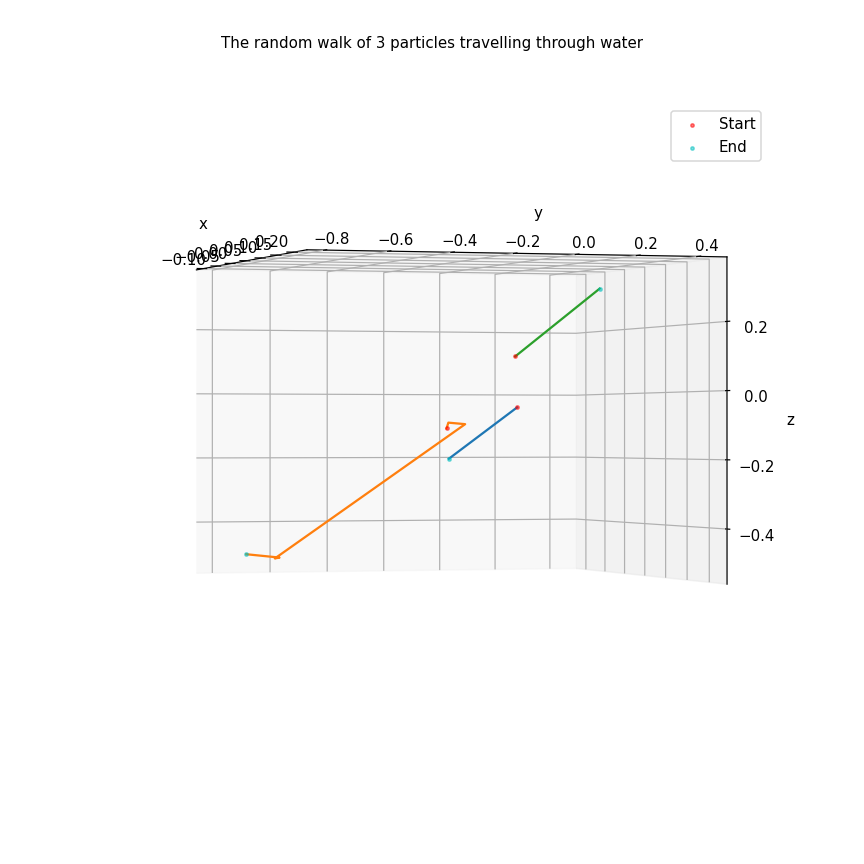

In [47]:
# function to calculate the mean free path and probability or absorption of a given material
def mfp_calc(absorb_cross_sec, scatter_cross_sec, density, molar_mass):
    """
    This function uses the data from Table 1 to calculate the macroscopic cross sections associated with scattering and
    absorption for each material, and then uses that to calculate the materials mean free path and the probability of
    absorption.
    
    Parameters: absorb_cross_sec - float, microscopic absorption cross section (cm^2)
                scatter_cross_sec - float, microscopic scattering cross section (cm^2)
                density - float, density of material (g/cm^3)
                molar_mass - float, molar mass of material (g/mol)
    
    Returns: mfp - float, mean free path of material (including scattering and absorption) (cm)
             p_absorb - float, probability a neutron is absorbed when colliding with a particle in the material 
    """
    # calculate macroscopic cross sections for absorption and scattering (per cm)
    sig_absorb = (density*N_A*absorb_cross_sec)/molar_mass
    sig_scatter = (density*N_A*scatter_cross_sec)/molar_mass
    
    # calculate the mean free path (cm)
    mfp = 1/(sig_absorb + sig_scatter)
    
    # calculate probability of absorption
    p_absorb = sig_absorb/(sig_absorb + sig_scatter)
    
    return mfp, p_absorb


# calculate mfp and absorption probability for water, lead and graphite
mfp_water, p_absorb_water  = mfp_calc(abs_cs_water, sca_cs_water, rho_water, mol_mass_water)
mfp_lead, p_absorb_lead = mfp_calc(abs_cs_lead, sca_cs_lead, rho_lead, mol_mass_lead)
mfp_graphite, p_absorb_graphite = mfp_calc(abs_cs_graphite, sca_cs_graphite, rho_graphite, mol_mass_graphite)

# function to simulate collisions within given material of given length
def rand_walk(mfp, p_absorb, L, particle_n):
    """
    This function simulates the random walk of a given number of particles in a material.
    
    Parameters: mfp - float, mean free path of material
                p_absorb - float, probability a neutron is absorbed when colliding with a particle in the material
                L - float, thickness of material
                particle_n - integer, number of neutrons being simulated
    
    Returns: particle_walk - array of floats, contains the paths that the particles being simulated took whilst in the
                                              material
    """
    # create starting array
    particle_walk = np.zeros([3])
    
    # create variable which will count up to the number of particles incident on the material
    particles_completed = 0
    while particles_completed < particle_n:
        
        # generate initial y and z position (x position will be taken as positive of value generated)
        r_0 = rand_iso(1, rand_exp(np.random.uniform(), mfp))[0]
    
        # add array of zeros before initial position so at end each particle can be distinguished
        pos = np.vstack([np.array([[0, 0, 0]]),[abs(r_0[0]), r_0[1], r_0[2]]])
    
        # create boolean variable that is true if particle hasn't been absorbed or scattered out of the material
        particle_live = True
        while particle_live == True:
            
            # checks if particle is still in the material
            if 0 <= pos[-1][0] <= L:
                
                # generates random number to absorb particle if its below absorption probability
                if np.random.uniform() > p_absorb:
                    
                    # if particle not absorbed it is scattered by a random (exponentially distributed)
                    # amount in all directions
                    pos = np.vstack([pos, pos[-1] + rand_iso(1, rand_exp(np.random.uniform(), mfp))[0]])

                else:
                    # if random number less than absorption prob then particle is absorbed and while loop ends
                    particle_live = False
            else:
                # if particle not within the material then while loop ends
                particle_live = False
        
        # position array for each particles path added to the starting array
        particle_walk = np.vstack([particle_walk, pos]) 
        
        # variable increases by 1 to show particles path has finished
        particles_completed += 1
    
    # returns array with all particle positions, with starting [0,0,0] removed
    return particle_walk[1:,:]


# use walk function for water with 3 particles
walk = (rand_walk(mfp_water, p_absorb_water, 10, 3))

# find indices where each particles walk ends
p_start = np.where(walk[:,0] == [0])[0][1:]

# split array generated by function into individual arrays for each particles walk
individual_particles = np.split(walk, p_start)

# make plot interactive
%matplotlib notebook

# repeat to fix graphics errors
%matplotlib notebook

# create figure and add 3D subplot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = '3d')

# plot each particles walk
for i in range(len(individual_particles)):
    ax.plot(individual_particles[i][1:,0],individual_particles[i][1:,1],individual_particles[i][1:,2])
    ax.scatter(individual_particles[i][1,0],individual_particles[i][1,1],individual_particles[i][1,2], color = 'r',
                s = 5, alpha = 0.5, label = "Start")
    ax.scatter(individual_particles[i][-1,0],individual_particles[i][-1,1],individual_particles[i][-1,2], color = 'c',
                s = 5, alpha = 0.5, label = "End")
    if i == 0:
        plt.legend()

# add title and label axes
fig.text(0.5, 0.95, "The random walk of 3 particles travelling through water", ha='center', va='center')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

Now, using everything from above, the behaviour of many neutrons can be simulated when travelling through each of the 3 materials.  First, a new function is defined which calculates only isotropic x values, as that is the only direction which has limitations in the simulation, so this will speed up the calculations.  Then the $neutron\,emission$ function is defined, which simulates the behaviour of a chosen number of neutrons, 10000 here, and returns the number of neutrons that were reflected, absorbed and transmitted.  This function is used 10 times for each material to obtain a mean value for each count with an associated error.  This data is then printed and a plot showing the total counts is shown below.

Transmition through a fixed thickness - Water

Thickness = 10cm
Neutrons Absorbed = 1458 ± 28
Neutrons Reflected = 8521 ± 27
Neutrons Transmitted = 20 ± 5
Percentage Transmitted = 0.20% ± 0.05%

Transmition through a fixed thickness - Lead

Thickness = 10cm
Neutrons Absorbed = 891 ± 31
Neutrons Reflected = 7203 ± 27
Neutrons Transmitted = 1906 ± 23
Percentage Transmitted = 19.06% ± 0.23%

Transmition through a fixed thickness - Graphite

Thickness = 10cm
Neutrons Absorbed = 66 ± 7
Neutrons Reflected = 7809 ± 34
Neutrons Transmitted = 2125 ± 32
Percentage Transmitted = 21.25% ± 0.32%



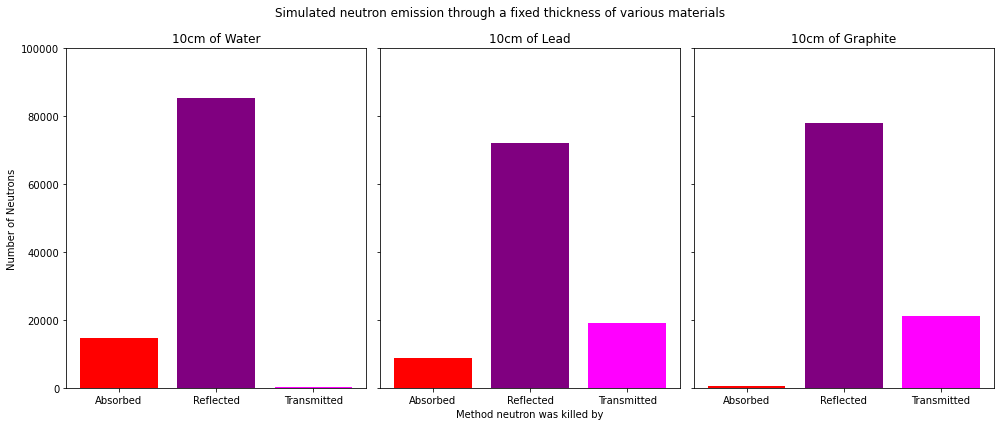

In [48]:
# function that generates random x position with exponentially distributed lengths as only x position is needed
def rand_x(n, step_len):
    """
    Thus function generates random isotropic x values
    
    Parameters: n - integer, desired number of x values
                step_len - float or array of size n, lengths of the steps taken in the x direction
                
    Returns: array of isotropic x values
    """
    return step_len*np.sin(np.arccos(1 - 2*np.random.uniform(size = n)))*np.cos(np.random.uniform(0,2*np.pi, size = n))


# function that simulates the emission of a given number of neutrons into a given thickness of a given material
def neutron_emission(mfp, p_absorb, L, particle_n):
    """
    This function simulates the behaviour of chosen number of neutrons after entering a chosen material of a chosen 
    thickness.
    
    Parameters: mfp - float, mean free path of material
                p_absorb - float, probability a neutron is absorbed when colliding with a particle in the material
                L - float, thickness of material
                particle_n - integer, number of neutrons being simulated
    
    Returns: n_absorb - integer, number of absorbed neutrons
             n_reflect - integer, number of reflected neutrons
             n_transmit - integer, number of transmitted neutrons
    """
    # create counts for the number of absorbed, reflected and transmitted neutrons
    n_absorb = 0
    n_reflect = 0
    n_transmit = 0
    
    # calculate initial x position of all neutrons
    x_pos = abs(rand_x(particle_n, rand_exp(np.random.uniform(size = particle_n), mfp)))
    
    # check how many particles are absorbed straight away
    absorb = np.where(np.random.uniform(size = len(x_pos)) < p_absorb)
    n_absorb += len(absorb[0])
    x_pos = np.delete(x_pos, absorb)
    
    # while loop runs whilst neutrons are still scattering
    while len(x_pos) > 0:
            
        # scatter neutrons
        x_pos += rand_x(len(x_pos), rand_exp(np.random.uniform(size = len(x_pos)), mfp))
            
        # count reflected neutrons and delete from position array
        reflect = np.where(x_pos < 0)
        n_reflect += len(reflect[0]) 
        x_pos = np.delete(x_pos, reflect)
                 
        # count transmitted neutrons and delete from position array
        transmit = np.where(x_pos > L)
        n_transmit += len(transmit[0])
        x_pos = np.delete(x_pos, transmit)
            
        # count absorbed neutrons and delete from position array
        absorb = np.where(np.random.uniform(size = len(x_pos)) < p_absorb)
        n_absorb += len(absorb[0])
        x_pos = np.delete(x_pos, absorb)

    return n_absorb, n_reflect, n_transmit


# define number of neutrons used and number of runs
neutron_n = 10000
runs_n = 10

# define thickness of material
LENGTH = 10 # (cm)

# create empty arrays for 10 runs of the neutron emission simulation
water = np.zeros([runs_n,3])
lead = np.zeros([runs_n,3])
graphite = np.zeros([runs_n,3])

for i in range(runs_n):
    
    # equate i-th index in each array to the three simulated neutron counts 
    water[i] = neutron_emission(mfp_water, p_absorb_water, LENGTH, neutron_n)
    lead[i] = neutron_emission(mfp_lead, p_absorb_lead, LENGTH, neutron_n)
    graphite[i] = neutron_emission(mfp_graphite, p_absorb_graphite, LENGTH, neutron_n)

# calculate mean of each count for each material and put eaach value into an array
water_mean = np.mean(water, axis = 0)
lead_mean = np.mean(lead, axis = 0)
graphite_mean = np.mean(graphite, axis = 0)
mat_means = [water_mean, lead_mean, graphite_mean]

# calculate standard deviation of each count for each material and put eaach value into an array
water_std = np.std(water, axis = 0)
lead_std = np.std(lead, axis = 0)
graphite_std = np.std(graphite, axis = 0)
mat_stds = [water_std, lead_std, graphite_std]

# make plot non-interactive
%matplotlib inline

# create and size figure and create subplots
fig, ax = plt.subplots(1,3, sharey = True, figsize = (14,6))

# define names of materials used
mat_names = ["Water", "Lead", "Graphite"]
for i, material in enumerate([water, lead, graphite]):
    
    # print the information about each material
    print(f"Transmition through a fixed thickness - {mat_names[i]}\n")
    print("Thickness = 10cm")
    print("Neutrons Absorbed = {0:.0f} \u00b1 {1:.0f}".format(mat_means[i][0], mat_stds[i][0]))
    print("Neutrons Reflected = {0:.0f} \u00b1 {1:.0f}".format(mat_means[i][1], mat_stds[i][1]))
    print("Neutrons Transmitted = {0:.0f} \u00b1 {1:.0f}".format(mat_means[i][2], mat_stds[i][2]))
    print("Percentage Transmitted = {0:.2%} \u00b1 {1:.2%}\n".format(mat_means[i][2]/(neutron_n), mat_stds[i][2]/(neutron_n)))
    
    # calculate the total number of neutrons that were absorbed, reflected and transmitted
    mat_totals = np.sum(material, axis = 0)
    
    # create bar plot for each material with title, showing total number of neutrons absorbed, reflected and transmitted
    ax[i].bar([1,2,3], mat_totals, color = ('red', 'purple', 'magenta'))
    ax[i].set_title(f"10cm of {mat_names[i]}")
    
    # make x-axis labels the three methods the neutrons were killed by
    ax[i].set_xticks([1,2,3])
    ax[i].set_xticklabels(["Absorbed", "Reflected", "Transmitted"])
    
    # set y limits so plots can be compared and share y-axis
    ax[i].set_ylim(0, runs_n*neutron_n)


# label axes and add title for entire figure
ax[0].set_ylabel("Number of Neutrons")
ax[1].set_xlabel("Method neutron was killed by")
fig.suptitle("Simulated neutron emission through a fixed thickness of various materials")
plt.tight_layout()
plt.show()

The simulation above was for a fixed thickness of each material, so below the thickness of each material is varied.  The thicknesses are first chosen and then the simulation is run for each material at each length.  The data is then plotted so that the variation with length can be visualised.

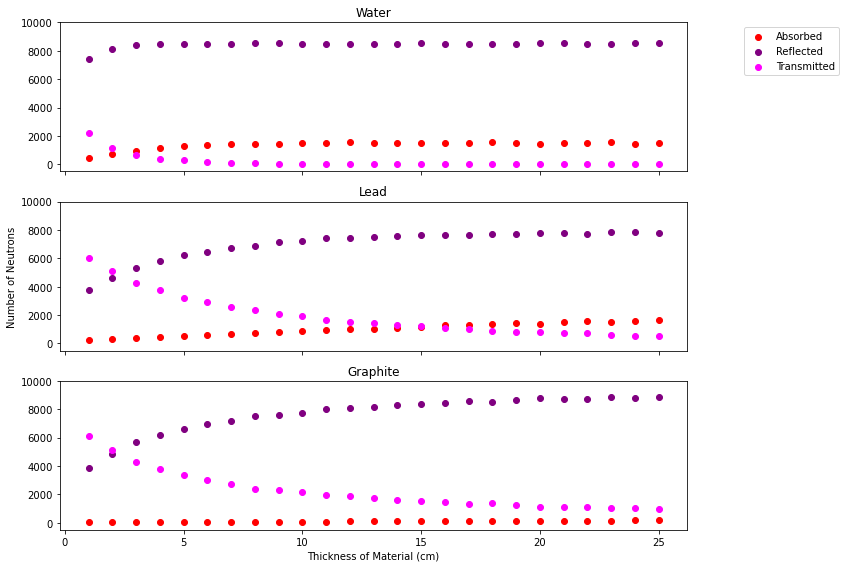

In [49]:
# define array of lengths from 1cm to 30cm
lengths = np.arange(1,26,1)

# create an empty array for each material which will contain the conuted neutron values for various lengths
water_vary_l = np.zeros([len(lengths),3])
lead_vary_l = np.zeros([len(lengths),3])
graphite_vary_l = np.zeros([len(lengths),3])

for i, l in enumerate(lengths):
    
    # equate the i-th value of each array to the counted neutron values at the l-th length
    water_vary_l[i] = neutron_emission(mfp_water, p_absorb_water, l, neutron_n)
    lead_vary_l[i] = neutron_emission(mfp_lead, p_absorb_lead, l, neutron_n)
    graphite_vary_l[i] = neutron_emission(mfp_graphite, p_absorb_graphite, l, neutron_n)

# create one array contaning all counted values
vary_l = np.hstack([water_vary_l, lead_vary_l, graphite_vary_l])

# make plot non-interactive
%matplotlib inline

# create and size figure and create subplots
fig, ax = plt.subplots(3, 1, sharex = True, figsize = (12,8))

for i, k in enumerate(range(0,9,3)):
    
    # for each material, plot the number of absorbed, reflected and transmitted neutrons at each length 
    ax[i].scatter(lengths, vary_l[:,k], color = 'red', label = "Absorbed")
    ax[i].scatter(lengths, vary_l[:,k+1], color = 'purple', label = "Reflected")
    ax[i].scatter(lengths, vary_l[:,k+2], color = 'magenta', label = "Transmitted")
    
    # set y limit so that the plots can be compared by eye and title plots
    ax[i].set_ylim(-500,10000)
    ax[i].set_title(f"{mat_names[i]}")
    
    if i == 0:
        # add legend
        ax[i].legend(bbox_to_anchor = (1.25, 1))

# label axes
ax[1].set_ylabel("Number of Neutrons")
ax[2].set_xlabel("Thickness of Material (cm)")
plt.tight_layout()
plt.show()

The number of particles transmitted looks exponential in the plots above, so the characteristic attenuation length can be found using the same method as before.  The transmit counts are all logged as that makes the relationship linear.  The attenuation lengths and corresponding errors are calculated from the linear polyfit as before, and are printed along with a plot showing the relationship for each material (graphite may look non-linear, but when the thickness is increased up to $100cm$, it can be seen that is it linear).

The characteristic attenuation length of Water is 2.22 ± 0.11 cm
The characteristic attenuation length of Lead is 10.35 ± 0.25 cm
The characteristic attenuation length of Graphite is 14.02 ± 0.64 cm


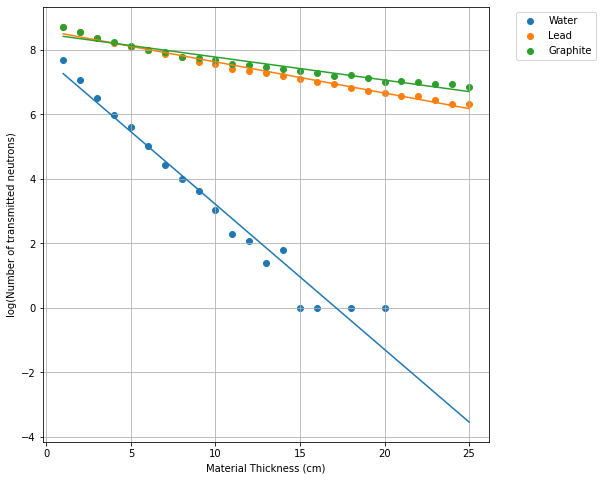

In [50]:
# define arrays containing the number of transmitted neutrons for each length
water_transmit = water_vary_l[:,2]
lead_transmit = lead_vary_l[:,2]
graphite_transmit = graphite_vary_l[:,2]

# adjust the water array as there can be counts of 0 which creates an error when taking the log later
water_transmit = np.where(water_transmit == 0, np.e, water_transmit)

# create and size figure and create subplot
fig, ax = plt.subplots(1,1, figsize = (8,8))

# create empty arrays for the attenuation lengths and their errors
transmit_atten_lens = np.zeros([3])
transmit_atten_len_errs = np.zeros([3])

for i, vals in enumerate([water_transmit, lead_transmit, graphite_transmit]):
    
    # log all values in the array for each material
    log_transmit = np.log(vals)
    
    # as all 0's were swapped for e's, anywhere that is now equal to 1 can be deleted from the array and the length
    # array is shortened accordingly
    used_lengths = np.delete(lengths, np.where(log_transmit == 1))
    log_transmit = np.delete(log_transmit, np.where(log_transmit == 1))
    
    # perform a polyfit and polyval
    transmit_coefs, transmit_covr = np.polyfit(used_lengths, log_transmit, 1, cov = True)
    transmit_fits = np.polyval(transmit_coefs, lengths)
    
    # calculate attenuation lengths and errors
    transmit_atten_lens[i] = -1/transmit_coefs[0]
    transmit_atten_len_errs[i] = np.abs(transmit_atten_lens[i]*(np.sqrt(transmit_covr[0][0])/transmit_coefs[0]))
    
    # plot lengths against logged transmit counts and the fitted linear data
    ax.scatter(used_lengths, log_transmit, label = f"{mat_names[i]}")
    ax.plot(lengths, transmit_fits)
    
    # print the characteristic attenuation length of each material
    print(f"The characteristic attenuation length of {mat_names[i]} is {transmit_atten_lens[i]:.2f} \u00b1 {transmit_atten_len_errs[i]:.2f} cm")

# label axes, add legend and grid
ax.set_xlabel("Material Thickness (cm)")
ax.set_ylabel("log(Number of transmitted neutrons)")
plt.legend(bbox_to_anchor = (1.25, 1))
plt.grid()
plt.show()